<a href="https://colab.research.google.com/github/Hussain-M53/AI-ML-DL-projects/blob/main/Sales_Forecasting_Pakistan_State_Oil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
df = pd.read_csv("/content/drive/My Drive/Sales_Data.csv",encoding = 'latin1')

In [3]:
df.head()

,Customer Name,Product Name,Month,Fiscal Year,Total Volume Sold,Region,Sales Organisation
0,A & M P/S,BLAZE 4T 3D PROTECT- 01 LTR,October,2018,96.0,Central,Retail Business
1,A & M P/S,BLAZE 4T 3D PROTECT- 700 ML,October,2018,58.8,Central,Retail Business
2,A & Z OIL (PVT) LTD,GEARLED EP 220 210Ltrs Plastic Drums,March,2018,210.0,Central,Strategic Accounts
3,A & Z OIL (PVT) LTD,GEARLED EP 680 210Ltrs Plastic Drums,May,2018,420.0,Central,Strategic Accounts
4,A & Z OIL (PVT) LTD,PC TLX PLUS 404 PL DRUM 208LTR,March,2018,416.0,Central,Strategic Accounts


In [3]:
df.shape

(273730, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273730 entries, 0 to 273729
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Customer Name       273730 non-null  object 
 1   Product Name        273730 non-null  object 
 2   Month               273730 non-null  object 
 3   Fiscal Year         273730 non-null  int64  
 4   Total Volume Sold   273730 non-null  float64
 5   Region              273730 non-null  object 
 6   Sales Organisation  273730 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 14.6+ MB


In [5]:
df.isnull().sum() #no missing values

Customer Name         0
Product Name          0
Month                 0
Fiscal Year           0
Total Volume Sold     0
Region                0
Sales Organisation    0
dtype: int64

In [4]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
processed_df = df.copy()
processed_df['Month'] = pd.Categorical(processed_df['Month'], categories=month_order).codes + 1
processed_df = processed_df.drop(['Region', "Sales Organisation"],axis = 1)
processed_df

,Customer Name,Product Name,Month,Fiscal Year,Total Volume Sold
0,A & M P/S,BLAZE 4T 3D PROTECT- 01 LTR,10,2018,96.0
1,A & M P/S,BLAZE 4T 3D PROTECT- 700 ML,10,2018,58.8
2,A & Z OIL (PVT) LTD,GEARLED EP 220 210Ltrs Plastic Drums,3,2018,210.0
3,A & Z OIL (PVT) LTD,GEARLED EP 680 210Ltrs Plastic Drums,5,2018,420.0
4,A & Z OIL (PVT) LTD,PC TLX PLUS 404 PL DRUM 208LTR,3,2018,416.0
...,...,...,...,...,...
273725,ZOOM PETROLEUM SERVICE,CARIENT PLUS SAE 20W-50 (SL/CF) 4L CAN,3,2022,80.0
273726,ZOOM PETROLEUM SERVICE,DEO-8000 15w40(C1-4) 04 Ltr PL CAN,3,2022,176.0
273727,ZOOM PETROLEUM SERVICE,DEO-8000 15w40(C1-4) 10 Ltr PL CAN,3,2022,40.0
273728,Zamzam Waziristan F/S,DEO 3000 SAE 50 4L Can,8,2022,512.0


## Incorporating Factors

In [5]:
eco_rate = {
    2018: 6.15,
    2019: 2.5,
    2020: -1.27,
    2021: 6.49,
    2022: 6.19
}

# Add the 'Economic Growth' column by mapping 'Fiscal Year' to 'eco_rate'
processed_df['Economic Growth'] = processed_df['Fiscal Year'].map(eco_rate)

industry_rate = [30.50,22.27,-1.01,1.96,17.07,2.10,-36.74,17.63,12.93,-15.61,8.23,5.66,-41.21,-4.29,27.08,39.88,-40.24,2.25,-22.96,4.26,14.71,4.62,-6.79,41.21,-71.05,2.58,27.74,8.94,2.21,14.07,-48.06,5.43,-32.64,8.15,11.48,59.14,-22.34,-1.14,24.49,20.71,-24.14,-4.16,-6.70,2.17,28.96,-31.32,-5.45,21.40,-34.42,14.03,10.34,15.51,-2.28,-1.57,-40.30,21.73,26.62,-0.53,2.61,-2.68]
pso_rate = [19.06,2.14,27.94,-5.51,24.86,3.42,22.48,-2.74,23.73,4.14,21.31,11.58,-18.39,4.96,1.98,6.92,-10.84,11.54,-4.23,-2.21,7.64,-10.20,2.38,6.24,-13.47,4.44,13.61,-12.04,1.54,18.00,-25.02,4.02,9.22,3.19,-5.71,1.06,-11.86,10.84,-2.68,-4.30,-0.03,5.44,-6.89,3.12,2.30,-8.48,11.73,-5.34,-4.04,6.69,2.95,-1.36,-8.35,11.24,-7.52,1.91,2.96,-4.67,7.46,-4.91]

def calculate_index(year, month):
    if month >= 7:
        return (year - 2018) * 12 + (month - 7)
    else:
        return (year - 2018) * 12 + (month + 5)

# Map 'Fiscal Year' and 'Month' to the corresponding index in industry_rate and pso_rate lists
processed_df['Industry Growth'] = [industry_rate[calculate_index(year, month)] for year, month in zip(processed_df['Fiscal Year'], processed_df['Month'])]
processed_df['PSO Growth'] = [pso_rate[calculate_index(year, month)] for year, month in zip(processed_df['Fiscal Year'], processed_df['Month'])]

processed_df



,Customer Name,Product Name,Month,Fiscal Year,Total Volume Sold,Economic Growth,Industry Growth,PSO Growth
0,A & M P/S,BLAZE 4T 3D PROTECT- 01 LTR,10,2018,96.0,6.15,1.96,-5.51
1,A & M P/S,BLAZE 4T 3D PROTECT- 700 ML,10,2018,58.8,6.15,1.96,-5.51
2,A & Z OIL (PVT) LTD,GEARLED EP 220 210Ltrs Plastic Drums,3,2018,210.0,6.15,12.93,23.73
3,A & Z OIL (PVT) LTD,GEARLED EP 680 210Ltrs Plastic Drums,5,2018,420.0,6.15,8.23,21.31
4,A & Z OIL (PVT) LTD,PC TLX PLUS 404 PL DRUM 208LTR,3,2018,416.0,6.15,12.93,23.73
...,...,...,...,...,...,...,...,...
273725,ZOOM PETROLEUM SERVICE,CARIENT PLUS SAE 20W-50 (SL/CF) 4L CAN,3,2022,80.0,6.19,26.62,2.96
273726,ZOOM PETROLEUM SERVICE,DEO-8000 15w40(C1-4) 04 Ltr PL CAN,3,2022,176.0,6.19,26.62,2.96
273727,ZOOM PETROLEUM SERVICE,DEO-8000 15w40(C1-4) 10 Ltr PL CAN,3,2022,40.0,6.19,26.62,2.96
273728,Zamzam Waziristan F/S,DEO 3000 SAE 50 4L Can,8,2022,512.0,6.19,14.03,6.69


## Mean Encoding on categorical columns


---

**NOTE : Mean Encoding cannot be a good fit as Different categorical column rows can have same target variable value**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define your target variable (the variable you want to predict)
target_variable = 'Total Volume Sold'

# Define your categorical columns (the variables you want to mean encode)
categorical_columns = ['Customer Name', 'Product Name']

# Perform mean encoding for the categorical columns in the training data
for col in categorical_columns:
    mean_encode = processed_df.groupby(col)[target_variable].mean().to_dict()
    processed_df[col + '_mean_encoded'] = processed_df[col].map(mean_encode)

# Define your feature columns (including the original numeric columns)
feature_columns = ['Customer Name_mean_encoded', 'Product Name_mean_encoded', 'Fiscal Year', 'Month','Economic Growth',	'Industry Growth',	'PSO Growth']

# Split the data into training and testing sets
X = processed_df[feature_columns]
y = processed_df[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)
processed_df

,Customer Name,Product Name,Month,Fiscal Year,Total Volume Sold,Economic Growth,Industry Growth,PSO Growth,Customer Name_mean_encoded,Product Name_mean_encoded
0,A & M P/S,BLAZE 4T 3D PROTECT- 01 LTR,10,2018,96.0,6.15,1.96,-5.51,160.082353,135.257592
1,A & M P/S,BLAZE 4T 3D PROTECT- 700 ML,10,2018,58.8,6.15,1.96,-5.51,160.082353,224.001942
2,A & Z OIL (PVT) LTD,GEARLED EP 220 210Ltrs Plastic Drums,3,2018,210.0,6.15,12.93,23.73,436.666667,1042.096774
3,A & Z OIL (PVT) LTD,GEARLED EP 680 210Ltrs Plastic Drums,5,2018,420.0,6.15,8.23,21.31,436.666667,869.013158
4,A & Z OIL (PVT) LTD,PC TLX PLUS 404 PL DRUM 208LTR,3,2018,416.0,6.15,12.93,23.73,436.666667,3130.400000
...,...,...,...,...,...,...,...,...,...,...
273725,ZOOM PETROLEUM SERVICE,CARIENT PLUS SAE 20W-50 (SL/CF) 4L CAN,3,2022,80.0,6.19,26.62,2.96,128.107831,280.741775
273726,ZOOM PETROLEUM SERVICE,DEO-8000 15w40(C1-4) 04 Ltr PL CAN,3,2022,176.0,6.19,26.62,2.96,128.107831,243.487238
273727,ZOOM PETROLEUM SERVICE,DEO-8000 15w40(C1-4) 10 Ltr PL CAN,3,2022,40.0,6.19,26.62,2.96,128.107831,256.006397
273728,Zamzam Waziristan F/S,DEO 3000 SAE 50 4L Can,8,2022,512.0,6.19,14.03,6.69,368.545455,473.062627


## Label Encoding on Categorical Columns

In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define your target variable (the variable you want to predict)
target_variable = 'Total Volume Sold'

# Define your categorical columns (the variables you want to label encode)
categorical_columns = ['Customer Name', 'Product Name']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode the categorical columns in your dataset
for col in categorical_columns:
    processed_df[col + '_encoded'] = label_encoder.fit_transform(processed_df[col])

# Define your feature columns (including the original numeric columns)
feature_columns = ['Customer Name_encoded', 'Product Name_encoded', 'Fiscal Year', 'Month', 'Economic Growth', 'Industry Growth', 'PSO Growth']

# Split the data into training and testing sets
X = processed_df[feature_columns]
y = processed_df[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)
processed_df

,Customer Name,Product Name,Month,Fiscal Year,Total Volume Sold,Economic Growth,Industry Growth,PSO Growth,Customer Name_encoded,Product Name_encoded
0,A & M P/S,BLAZE 4T 3D PROTECT- 01 LTR,10,2018,96.0,6.15,1.96,-5.51,8,7
1,A & M P/S,BLAZE 4T 3D PROTECT- 700 ML,10,2018,58.8,6.15,1.96,-5.51,8,8
2,A & Z OIL (PVT) LTD,GEARLED EP 220 210Ltrs Plastic Drums,3,2018,210.0,6.15,12.93,23.73,9,150
3,A & Z OIL (PVT) LTD,GEARLED EP 680 210Ltrs Plastic Drums,5,2018,420.0,6.15,8.23,21.31,9,159
4,A & Z OIL (PVT) LTD,PC TLX PLUS 404 PL DRUM 208LTR,3,2018,416.0,6.15,12.93,23.73,9,248
...,...,...,...,...,...,...,...,...,...,...
273725,ZOOM PETROLEUM SERVICE,CARIENT PLUS SAE 20W-50 (SL/CF) 4L CAN,3,2022,80.0,6.19,26.62,2.96,4840,21
273726,ZOOM PETROLEUM SERVICE,DEO-8000 15w40(C1-4) 04 Ltr PL CAN,3,2022,176.0,6.19,26.62,2.96,4840,100
273727,ZOOM PETROLEUM SERVICE,DEO-8000 15w40(C1-4) 10 Ltr PL CAN,3,2022,40.0,6.19,26.62,2.96,4840,101
273728,Zamzam Waziristan F/S,DEO 3000 SAE 50 4L Can,8,2022,512.0,6.19,14.03,6.69,4846,71


## Data frame ready for Model fitting

In [12]:
X

,Customer Name_encoded,Product Name_encoded,Fiscal Year,Month,Economic Growth,Industry Growth,PSO Growth
0,8,7,2018,10,6.15,1.96,-5.51
1,8,8,2018,10,6.15,1.96,-5.51
2,9,150,2018,3,6.15,12.93,23.73
3,9,159,2018,5,6.15,8.23,21.31
4,9,248,2018,3,6.15,12.93,23.73
...,...,...,...,...,...,...,...
273725,4840,21,2022,3,6.19,26.62,2.96
273726,4840,100,2022,3,6.19,26.62,2.96
273727,4840,101,2022,3,6.19,26.62,2.96
273728,4846,71,2022,8,6.19,14.03,6.69


In [13]:
y

0          96.0
1          58.8
2         210.0
3         420.0
4         416.0
          ...  
273725     80.0
273726    176.0
273727     40.0
273728    512.0
273729    840.0
Name: Total Volume Sold, Length: 273730, dtype: float64

In [14]:
X.isnull().sum()

Customer Name_encoded    0
Product Name_encoded     0
Fiscal Year              0
Month                    0
Economic Growth          0
Industry Growth          0
PSO Growth               0
dtype: int64

In [15]:
X_train.shape,X_test.shape

((260043, 7), (13687, 7))

## Model Fitting

In [16]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create and train a RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 4293359.032527983
R-squared: 0.19778890943474636


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Create the Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(random_state=0)

# Perform grid search with cross-validation
grid_search = GridSearchCV(gb_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_gb_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_gb_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1,verbose=1)
# Train the model with the TensorBoard callback
svr_model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = svr_model.predict(X_test)

# Evaluate the SVR model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create and train a Multi-layer Perceptron Regressor (Neural Network) model
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=0)
mlp_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = mlp_model.predict(X_test)

# Evaluate the MLP model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


In [48]:
# Now, you can use the trained model to make predictions for new data
new_data = pd.DataFrame({
    'Customer Name': ['ABID FILL STATION'],
    'Product Name': ['BLAZE 4T 3D PROTECT- 700 ML'],
    'Month': [3],
    'Fiscal Year': [2023],
    'Economic Growth' : [3.1],
    'Industry Growth' : [-14.85],
    'PSO Growth' : [4.49],
})

# Perform mean encoding for the new data using the same encodings from the training data
for col in categorical_columns:
    new_data[col + '_encoded'] = processed_df[processed_df[col] == new_data[col].iloc[0]][col + '_encoded'].iloc[0]

print(new_data)
new_data2 = pd.DataFrame({
    'Customer Name': ['A & M P/S'],
    'Product Name': ['BLAZE 4T 3D PROTECT- 700 ML'],
    'Month': [3],
    'Fiscal Year': [2023],
    'Economic Growth' : [3.1],
    'Industry Growth' : [-14.85],
    'PSO Growth' : [4.49],
})

# Perform mean encoding for the new data using the same encodings from the training data
for col in categorical_columns:
    new_data2[col + '_encoded'] = processed_df[processed_df[col] == new_data2[col].iloc[0]][col + '_encoded'].iloc[0]

print(new_data2)

# Make a prediction for the new data
prediction = model.predict(new_data[feature_columns])
prediction2 = model.predict(new_data2[feature_columns])
print(f"Predicted Volume for New Data 1: {prediction[0]}")
print(f"Predicted Volume for New Data 2: {prediction2[0]}")

       Customer Name                 Product Name  Month  Fiscal Year  \
0  ABID FILL STATION  BLAZE 4T 3D PROTECT- 700 ML      3         2023   

   Economic Growth  Industry Growth  PSO Growth  Customer Name_encoded  \
0              3.1           -14.85        4.49                     73   

   Product Name_encoded  
0                     8  
  Customer Name                 Product Name  Month  Fiscal Year  \
0     A & M P/S  BLAZE 4T 3D PROTECT- 700 ML      3         2023   

   Economic Growth  Industry Growth  PSO Growth  Customer Name_encoded  \
0              3.1           -14.85        4.49                      8   

   Product Name_encoded  
0                     8  
Predicted Volume for New Data 1: 40.94200000000002
Predicted Volume for New Data 2: 79.098


            Customer Name                 Product Name  Month  Fiscal Year  \
483     ABID FILL STATION  BLAZE 4T 3D PROTECT- 700 ML      3         2018   
38258   ABID FILL STATION  BLAZE 4T 3D PROTECT- 700 ML      3         2019   
99200   ABID FILL STATION  BLAZE 4T 3D PROTECT- 700 ML      3         2020   
181374  ABID FILL STATION  BLAZE 4T 3D PROTECT- 700 ML      3         2021   
271909  ABID FILL STATION  BLAZE 4T 3D PROTECT- 700 ML      3         2022   

        Total Volume Sold  Economic Growth  Industry Growth  PSO Growth  \
483                  42.0             6.15            12.93       23.73   
38258                42.0             2.50            14.71        7.64   
99200                 8.4            -1.27           -32.64        9.22   
181374               50.0             6.49            28.96        2.30   
271909               42.0             6.19            26.62        2.96   

        Customer Name_encoded  Product Name_encoded  
483                       

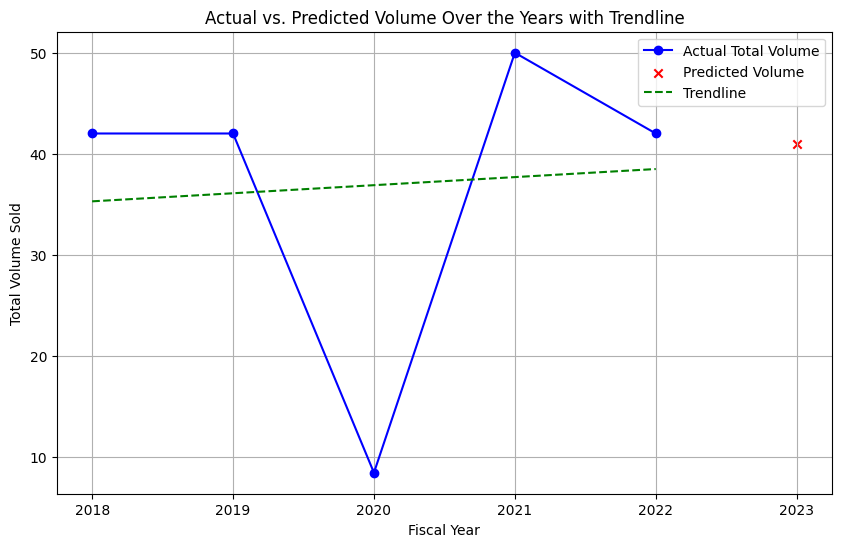

In [52]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

#--------------This commented code is to extract customers who have sales data of particular month and product for all 5 years----------------------------

# def has_data_for_all_years(group):
#     return all(year in group['Fiscal Year'].unique() for year in years_to_include)

# grouped = processed_df.groupby(['Customer Name', 'Product Name', 'Month'])
# filtered_groups = grouped.filter(has_data_for_all_years)
# filtered_customer_product_data = filtered_groups[['Customer Name', 'Product Name','Month']].drop_duplicates()
# print(filtered_customer_product_data)

years_to_include = [2018, 2019, 2020, 2021, 2022]
filtered_rows = processed_df[(processed_df['Customer Name'] == new_data['Customer Name'].iloc[0]) &
                   (processed_df['Product Name'] == new_data['Product Name'].iloc[0]) &
                   (processed_df['Month'] == new_data['Month'].iloc[0]) &
                   (processed_df['Fiscal Year'].isin(years_to_include))]
len(filtered_rows)

five_years_volumes = filtered_rows['Total Volume Sold']
predicted_volume = prediction[0]

years = filtered_rows['Fiscal Year']
print(filtered_rows)

slope, intercept, r_value, p_value, std_err = linregress(years, five_years_volumes)
trendline = intercept + slope * years
plt.figure(figsize=(10, 6))
plt.plot(years, five_years_volumes, marker='o', label='Actual Total Volume', color='blue')
plt.scatter([2023], [predicted_volume], color='red', marker='x', label='Predicted Volume')
plt.plot(years, trendline, label='Trendline', color='green', linestyle='--')
plt.xlabel('Fiscal Year')
plt.ylabel('Total Volume Sold')
plt.title('Actual vs. Predicted Volume Over the Years of ABID FILL STATION  purhcased BLAZE 4T 3D PROTECT- 700 ML with Trendline')

plt.legend()
plt.grid(True)
plt.show()

## Forecasting Future Sales

In [ ]:
import pandas as pd
import numpy as np

# Define a list of unique customer names, months, and product names
filtered_df = df[(df['Sales Organisation'] == 'Retail Business') & (df['Region'] == 'South')]
# Get the unique customers from the filtered DataFrame
len(filtered_df['Customer Name'].unique())
unique_customers = filtered_df['Customer Name'].unique()[:200]
unique_months = df['Month'].unique()
unique_products = df['Product Name'].unique()

# Create a dictionary to map month names to numerical values
month_to_numeric = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}


month_to_PSOgrowth = {
     'July': -4.29,
    'August': 4.52,
    'September':3.14,
    'October': 0.50,
    'November': -1.06,
    'December': 2.92,
    'January': -8.98,
    'February':0.85,
    'March':4.49,
    'April': -2.96,
    'May': 1.46,
    'June': 10.61
}

month_to_Industrygrowth = {
    'July': -54.74,
    'August': 10.85,
    'September': 11.53,
    'October': -10.46,
    'November': 7.98,
    'December': -4.73,
    'January': 6.29,
    'February':19.80,
    'March':-14.85,
    'April':-22.44,
    'May': 30.74,
    'June': -22.44
}
# Initialize an empty list to store DataFrames for predictions
prediction_dfs = []
i=1
# Make predictions for each combination
for customer_name in unique_customers:
    print(i)
    i+=1
    for month in unique_months:
        for product_name in unique_products:
            # Create a new row of data for prediction
            new_data = pd.DataFrame({
                'Customer Name': [customer_name],
                'Product Name': [product_name],
                'Month': [month_to_numeric[month]],  # Map month to numerical value
                'Fiscal Year': [2023],
                'Economic Growth' : 3.1,
                'Industry Growth' :month_to_Industrygrowth[month],
                'PSO Growth' :month_to_PSOgrowth[month] ,
            })

            # Perform mean encoding for the new data using the same encodings from the training data
            for col in categorical_columns:
              new_data[col + '_encoded'] = processed_df[processed_df[col] == new_data[col].iloc[0]][col + '_encoded'].iloc[0]


            # Make a prediction for the new data
            prediction = model.predict(new_data[feature_columns])

            # Append the prediction to the DataFrame
            new_data['Predicted Volume'] = prediction
            # Append the DataFrame to the list
            prediction_dfs.append(new_data)


# Concatenate all the DataFrames in the list
prediction_df = pd.concat(prediction_dfs, ignore_index=True)

# Display the first few rows of the prediction DataFrame
prediction_df = prediction_df.drop(['Customer Name_encoded','Product Name_encoded'],axis =1)
prediction_df.head()


In [ ]:
len(prediction_df)
prediction_df.info()

In [ ]:
#converting the month column back to categorical values
forcasted_df = prediction_df.copy()

def map_month(month_number):
    month_names = [
        'January', 'February', 'March', 'April', 'May', 'June',
        'July', 'August', 'September', 'October', 'November', 'December'
    ]
    return month_names[month_number - 1] if 1 <= month_number <= 12 else 'Unknown'

forcasted_df['Month'] = forcasted_df['Month'].apply(map_month)

#round the volume to 2dp and convert negative values to zero to avoid errors.
def replace_negative_and_round(value):
    if value < 0:
        return 0.00
    else:
        return round(value, 2)

# Apply the function to the 'Predicted Volume' column
forcasted_df['Predicted Volume'] = forcasted_df['Predicted Volume'].apply(replace_negative_and_round)
forcasted_df

## Storing the DataFrame to Colabs' Storage

In [ ]:
# Specify the file path where you want to save the Excel file in Colab's storage
file_path = '/content/drive/My Drive/Colab Notebooks/RB_SOUTH_20.xlsx'

# Use the to_excel method to export the DataFrame to an Excel file
forcasted_df.to_excel(file_path, index=False)

# Optionally, print the file path to confirm where it's saved
print("File saved to:", file_path)

File saved to: /content/drive/My Drive/Colab Notebooks/RB_SOUTH_200.xlsx


## Reading the stored excel file

In [ ]:
  # Specify the file path where the Excel file is saved in Colab's storage
  file_path = '/content/drive/My Drive/Colab Notebooks/RB_SOUTH_200.xlsx'
  import pandas as pd
  # Read the Excel file into a DataFrame
  loaded_df = pd.read_excel(file_path)
  loaded_df.head()

,Customer Name,Product Name,Month,Fiscal Year,Predicted Volume
0,A RASOOL QAZI AND CO,BLAZE 4T 3D PROTECT- 01 LTR,10,2024,74.591072
1,A RASOOL QAZI AND CO,BLAZE 4T 3D PROTECT- 700 ML,10,2024,101.049686
2,A RASOOL QAZI AND CO,GEARLED EP 220 210Ltrs Plastic Drums,10,2024,248.256286
3,A RASOOL QAZI AND CO,GEARLED EP 680 210Ltrs Plastic Drums,10,2024,189.260367
4,A RASOOL QAZI AND CO,PC TLX PLUS 404 PL DRUM 208LTR,10,2024,277.111250


## Downloading Excel File

In [ ]:
from google.colab import files

# Specify the path to the file in Colab's storage
colab_file_path = '/content/drive/My Drive/Colab Notebooks/RB_SOUTH_200.xlsx'

# Use the files.download function to download the file to your local machine
files.download(colab_file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>